In [1]:
import matplotlib
# Force matplotlib to not use any Xwindows backend.
import numpy as np
import pandas as pd
import requests
import matplotlib.pyplot as plt
import os.path


url = "http://data.kk.dk/dataset/9070067f-ab57-41cd-913e-bc37bfaf9acd/resource/9fbab4aa-1ee0-4d25-b2b4-b7b63537d2ec/download/befkbhalderkoencivst.csv"
response = requests.get(url, params={'downloadformat' : 'csv'})

fname = "befkbhalderkoencivst.csv"

if response.ok:
    with open(fname, 'wb') as f:
        f.write(response.content)

csv = pd.read_csv(fname)

dd = csv.as_matrix()
csv

,AAR,BYDEL,ALDER,CIVST,KOEN,PERSONER
0,2015,1,0,U,1,324
1,2015,1,0,U,2,332
2,2015,1,1,U,1,322
3,2015,1,1,U,2,265
4,2015,1,2,U,1,276
5,2015,1,2,U,2,249
6,2015,1,3,U,1,248
7,2015,1,3,U,2,254
8,2015,1,4,U,1,266
9,2015,1,4,U,2,220


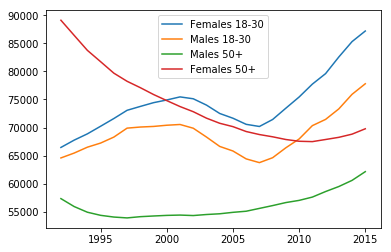

In [3]:
male1830 = np.array(dd[(dd[:,2] > 17) & (dd[:,2] < 31) & (dd[:,4] == 1)]);
female1830 = np.array(dd[(dd[:,2] > 17) & (dd[:,2] < 31) & (dd[:,4] == 2)]);
female50 = np.array(dd[(dd[:,2] > 50) & (dd[:,4] == 2)]);
male50 = np.array(dd[(dd[:,2] > 50) & (dd[:,4] == 1)]);
years = np.unique(dd[:,0])
male1830sum = np.array([np.sum(male1830[(male1830[:,0] == year)][:,5]) for year in years])
female1830sum = np.array([np.sum(female1830[(female1830[:,0] == year)][:,5]) for year in years])
female50sum = np.array([np.sum(female50[(female50[:,0] == year)][:,5]) for year in years])
male50sum = np.array([np.sum(male50[(male50[:,0] == year)][:,5]) for year in years])

plt.figure()
plt.plot(years, female1830sum, label="Females 18-30")
plt.plot(years, male1830sum, label="Males 18-30")
plt.plot(years, male50sum, label="Males 50+")
plt.plot(years, female50sum, label="Females 50+")
plt.legend()
plt.show()

In [4]:
# Assignment 3: Find the three most populated city parts(BYDEL), in 1992, 2000 and 2015
bydele = np.unique(dd[:,1]);
n1992 = np.array([np.sum(dd[(dd[:,0] == 1992) & (dd[:,1] == bydel)][:,5]) for bydel in bydele])
n1992

array([40595, 62221, 67251, 47854, 43688, 34303, 36746, 41668, 45305,
       42748,  2187])